# 《姜子牙》、《哪吒》的票房对比及评价分析

https://mp.weixin.qq.com/s/7aYzG32-MSSzE_dC9VMGJw

前言

随着国内疫情得到有效控制，每个地区的电影院都陆陆续续的开放了，而很多本应该在春节档上映的电影因为疫情撤档，现在也重新上映了。

和不少小伙伴一样，我一直对《姜子牙》满怀期待。于是，国庆第2天我便杀入影院。而关于《姜子牙》的评价呈现了两极分化，而它也经常被拿来和去年上映的《哪吒》对比。关于电影本身，我不做过多评价，主要是从数据的角度出发，把《姜子牙》和《哪吒》进行一个对比分析。

一、票房对比分析

两部电影的基本情况如下：

1.获取票房数据

为了使得数据统一，我选取上映的前9日的票房数据：



将其存于本地excel表格中，命名为“票房数据.xlsx”

2.票房走势分析

利用pandas库对票房数据进行分析，并绘制折线图：

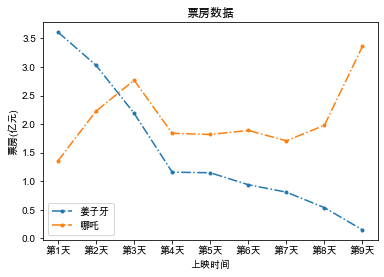

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 票房分析
# 这个是mac的画图中文乱码，window的可能不太一样
# 画图中文错误
# 用来正常显示中文标签
# window的画图中文乱码
# plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
# plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms']
# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False
# 可视化矩阵
    
data = pd.read_excel('data/票房数据.xlsx',index_col=0)  # 其中，index_col=0表示将第一列作为索引。运行结果如下：
data.plot(style='.-.')
plt.title('票房数据')
plt.ylabel('票房(亿元)')
plt.xlabel('上映时间')
plt.savefig('票房数据.png')


从图可以看出（仅代表个人观点）：

1、首映当日《姜子牙》票房明显高于《哪吒》。这大概是源于观众的期待，这也说明前期的宣传工作做到位了；

2、从走势来看，《姜子牙》呈现出明显下滑。这大概是因为上映后口碑上出现了两级分化，电影本身没有到达观众原本的期待；

3、从走势来看，《哪吒》后续走势强劲有力。这大概是因为上映后《哪吒》作为国产动漫的代表口口相传，吸引了越来越多的观众。

# 二、评价对比分析

这一部分主要是对观众的影评进行分析，评价数据来源于某瓣。

## 爬取影评

在网站简单搜索之后可以发现一个电影短评的接口：

https://movie.douban.com/subject/26794435/comments?start=20&limit=20&status=P&sort=new_score


    

In [ ]:
def get_comment(mid,page):
    '''
    获得评论页面的HTML
    '''
    start = (page-1)*20
    url = 'https://movie.douban.com/subject/%s/comments?start=%d&limit=20&status=P&sort=new_score'%(mid,start)
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0',
               'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
               'Accept-Language': 'zh-CN,zh;q=0.8,zh-TW;q=0.7,zh-HK;q=0.5,en-US;q=0.3,en;q=0.2',
               'Connection': 'keep-alive',
               'Upgrade-Insecure-Requests': '1'}
    cookies = {}
    res = requests.get(url,headers=headers,cookies=cookies)
    html = res.text
    return html

## 解析页面中的评论

In [6]:
def parse_comment(html):
    '''
    解析HTML中的评论
    '''
    comment = re.findall('<span class="short">(.*?)</span>',html)
    return comment

In [8]:
import re

commet = re.findall('<span class="short">(.*?)</span>','<span class="short">wo yong yuan zai.</span>')
commet

['wo yong yuan zai.']

这里就是一个简单的正则匹配，就不过多解释了。



## 定义爬取函数

In [9]:
def crawl_comment(mid,N,name):
    '''
    爬取指定页数的评论，并保存在本地
    '''
    comments = []
    for p in range(1,N+1):
        html = get_comment(mid,p)
        comment = parse_comment(html)
        comments.extend(comment)
        print('《%s》第%d页评论爬取完成(%d条)'%(name,p,len(comment)))
        time.sleep(random.uniform(3,5))
    with open('%s.txt'%name,'w') as f:
        f.write(json.dumps(comments))


注：time.sleep()很重要，否则请求过于频繁将触发安全机制，导致403

In [11]:
import random
random.uniform(3,5)

3.0513466784736796

## 完整代码

In [12]:
# -*- coding: utf-8 -*-
"""
Created on Sat Oct 10 12:01:35 2020

@author: kimol_love
"""
import re
import time
import json
import random
import requests

# 定义相关函数
def get_comment(mid,page):
    '''
    获得评论页面的HTML
    '''
    start = (page-1)*20
    url = 'https://movie.douban.com/subject/%s/comments?start=%d&limit=20&status=P&sort=new_score'%(mid,start)
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0',
               'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
               'Accept-Language': 'zh-CN,zh;q=0.8,zh-TW;q=0.7,zh-HK;q=0.5,en-US;q=0.3,en;q=0.2',
               'Connection': 'keep-alive',
               'Upgrade-Insecure-Requests': '1'}
    cookies = {}
    res = requests.get(url,headers=headers,cookies=cookies)
    html = res.text
    return html

def parse_comment(html):
    '''
    解析HTML中的评论
    '''
    comment = re.findall('<span class="short">(.*?)</span>',html)
    return comment

def crawl_comment(mid,N,name):
    '''
    爬取指定页数的评论，并保存在本地
    '''
    comments = []
    for p in range(1,N+1):
        html = get_comment(mid,p)
        comment = parse_comment(html)
        comments.extend(comment)
        print('《%s》第%d页评论爬取完成(%d条)'%(name,p,len(comment)))
        time.sleep(random.uniform(3,5))
    with open('%s.txt'%name,'w') as f:
        f.write(json.dumps(comments))

# 爬取姜子牙评论
crawl_comment('25907124',25,'姜子牙')
    
# 爬取哪吒评论
crawl_comment('26794435',25,'哪吒')

《姜子牙》第1页评论爬取完成(18条)
《姜子牙》第2页评论爬取完成(19条)
《姜子牙》第3页评论爬取完成(19条)
《姜子牙》第4页评论爬取完成(15条)
《姜子牙》第5页评论爬取完成(20条)
《姜子牙》第6页评论爬取完成(16条)
《姜子牙》第7页评论爬取完成(15条)
《姜子牙》第8页评论爬取完成(18条)
《姜子牙》第9页评论爬取完成(16条)
《姜子牙》第10页评论爬取完成(18条)
《姜子牙》第11页评论爬取完成(20条)
《姜子牙》第12页评论爬取完成(0条)
《姜子牙》第13页评论爬取完成(0条)
《姜子牙》第14页评论爬取完成(0条)
《姜子牙》第15页评论爬取完成(0条)
《姜子牙》第16页评论爬取完成(0条)
《姜子牙》第17页评论爬取完成(0条)
《姜子牙》第18页评论爬取完成(0条)
《姜子牙》第19页评论爬取完成(0条)
《姜子牙》第20页评论爬取完成(0条)
《姜子牙》第21页评论爬取完成(0条)
《姜子牙》第22页评论爬取完成(0条)
《姜子牙》第23页评论爬取完成(0条)
《姜子牙》第24页评论爬取完成(0条)
《姜子牙》第25页评论爬取完成(0条)
《哪吒》第1页评论爬取完成(18条)
《哪吒》第2页评论爬取完成(17条)
《哪吒》第3页评论爬取完成(18条)
《哪吒》第4页评论爬取完成(18条)
《哪吒》第5页评论爬取完成(20条)
《哪吒》第6页评论爬取完成(18条)
《哪吒》第7页评论爬取完成(19条)
《哪吒》第8页评论爬取完成(19条)
《哪吒》第9页评论爬取完成(19条)
《哪吒》第10页评论爬取完成(18条)
《哪吒》第11页评论爬取完成(20条)
《哪吒》第12页评论爬取完成(0条)
《哪吒》第13页评论爬取完成(0条)
《哪吒》第14页评论爬取完成(0条)
《哪吒》第15页评论爬取完成(0条)
《哪吒》第16页评论爬取完成(0条)
《哪吒》第17页评论爬取完成(0条)
《哪吒》第18页评论爬取完成(0条)
《哪吒》第19页评论爬取完成(0条)
《哪吒》第20页评论爬取完成(0条)
《哪吒》第21页评论爬取完成(0条)
《哪吒》第22页评论爬取完成(0条)
《哪吒》第23页评论爬取完成(0条)
《哪吒》第24页评论爬取完成(0条)
《哪吒》第25页评论爬取完成(0条)


# 词云分析



利用python的jieba库和wordcloud库对评论进行分析，绘制出词云。其中相应库的安装如下：

pip install jieba

pip install wordcloud

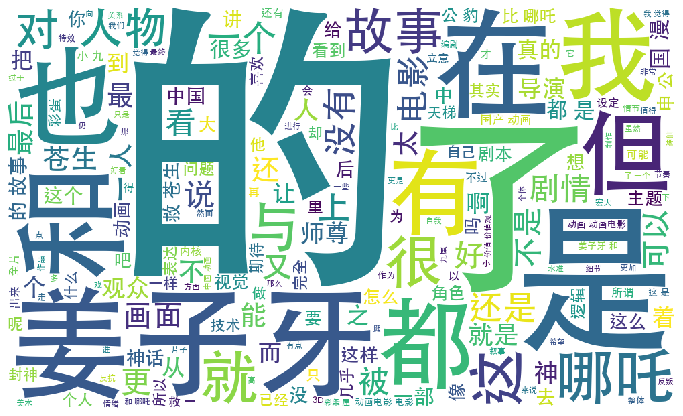

In [76]:
# -*- coding: utf-8 -*-
"""
Created on Sat Oct 10 12:22:53 2020

@author: kimol_love
"""
import json
import jieba
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# 定义相关函数
def create_wordcloud(comments,name):
    '''
    根据评论列表创建词云
    '''
    content = ''.join(comments)
    wl = jieba.cut(content,cut_all=True)
    wl_space_split = ' '.join(wl)
    wc = WordCloud(r'/System/Library/Fonts/STHeiti Medium.ttc',
                   background_color='white', # 背景颜色
                   width=1000,
                   height=600,).generate(wl_space_split)
    wc.to_file('%s.png'%name)


# 词云数据分析
with open('姜子牙.txt','r') as f:
    comments_jiang = json.loads(f.read())

    create_wordcloud(comments_jiang,'姜子牙评论')

plt.figure(figsize=(12,12))
plt.imshow(wc)  #用plt显示图片
plt.axis('off') #不显示坐标轴
plt.show() #显示图片
# with open('哪吒.txt','r') as f:
#     comments_ne = json.loads(f.read())
#     create_wordcloud(comments_ne,'哪吒评论')

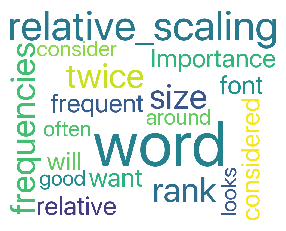

In [52]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
 
string = 'Importance of relative word frequencies for font-size. With relative_scaling=0, only word-ranks are considered. With relative_scaling=1, a word that is twice as frequent will have twice the size. If you want to consider the word frequencies and not only their rank, relative_scaling around .5 often looks good.'
font = r'/System/Library/Fonts/SFNS.ttf'

wc = WordCloud(font_path=font, #如果是中文必须要添加这个，否则会显示成框框
               background_color='white',
               width=1000,
               height=800,
               ).generate(string)
wc.to_file('ss.png') #保存图片
plt.imshow(wc)  #用plt显示图片
plt.axis('off') #不显示坐标轴
plt.show() #显示图片



In [73]:
# with open
# /Users/snszz/Desktop/hybrid subspace learning 1/hybrid_sl_code_python/hybrid_pacakage/practice/happy_to_learn/data/txt_read.txt_read

with open('data/txt_read.txt', 'r') as f:
    c = f.read()
    word = jieba.cut(c)
    words = list(word)
words
    


['常见',
 '的',
 '读写操作',
 '：',
 '\n',
 '\n',
 'with',
 ' ',
 'open',
 '(',
 'r',
 "'",
 'filename',
 '.',
 'txt',
 "'",
 ')',
 ' ',
 'as',
 ' ',
 'f',
 ':',
 '\n',
 '\xa0',
 ' ',
 '\xa0',
 'data',
 '_',
 'user',
 '=',
 'pd',
 '.',
 'read',
 '_',
 'csv',
 '(',
 'f',
 ')',
 ' ',
 '\xa0',
 '#',
 '文件',
 '的',
 '读',
 '操作',
 '\n',
 '\n',
 'with',
 ' ',
 'open',
 '(',
 "'",
 'data',
 '.',
 'txt',
 "'",
 ',',
 ' ',
 "'",
 'w',
 "'",
 ')',
 ' ',
 'as',
 ' ',
 'f',
 ':',
 '\n',
 '\xa0',
 ' ',
 '\xa0',
 'f',
 '.',
 'write',
 '(',
 "'",
 'hello',
 ' ',
 'world',
 "'",
 ')',
 ' ',
 '\xa0',
 '#',
 '文件',
 '的',
 '写',
 '操作',
 '\n',
 '\xa0',
 ' ',
 '\xa0',
 '\n',
 '相关',
 '参数',
 '：',
 '\n',
 '\n',
 'r',
 ':',
 '\xa0',
 '\xa0',
 ' ',
 '\xa0',
 '以',
 '只读',
 '方式',
 '打开',
 '文件',
 '。',
 '文件',
 '的',
 '指针',
 '将会',
 '放在',
 '文件',
 '的',
 '开头',
 '。',
 '这是',
 '*',
 '*',
 '默认',
 '模式',
 '*',
 '*',
 '。',
 '\n',
 'rb',
 ':',
 ' ',
 '以',
 '二进制',
 '格式',
 '打开',
 '一个',
 '文件',
 '用于',
 '只读',
 '。',
 '文件',
 '指针',
 '将会',
 '放在',
 '文件